y(1)=-0.813
y(1)=1.000
y(1)=2.041


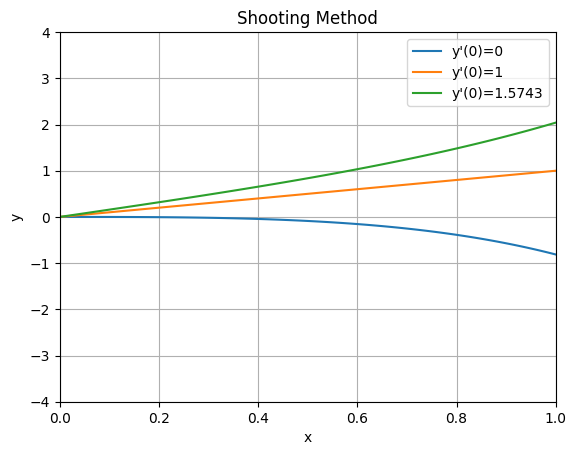

y(1)=-4.440
y(1)=-0.813
y(1)=2.813


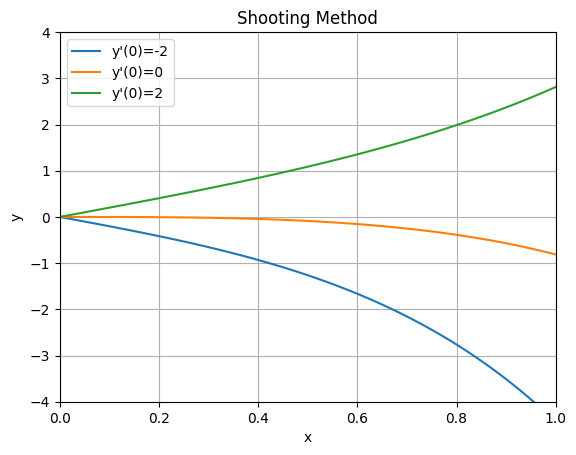

In [215]:
import numpy as np
import matplotlib.pyplot as plt

def shooting_method(f, a, b, alpha, beta, h, guesses):
    """
    f: function defining the 2nd order ODE as a system of 1st order ODEs
    a: start of interval
    b: end of interval
    alpha: boundary condition at a
    beta: boundary condition at b
    h: step size
    guesses: list of initial guesses for the value of y'(a)
    """
    n = int((b-a)/h)
    x = np.linspace(a, b, n+1)
    
    for guess in guesses:
        y = np.zeros((n+1, 2))
        y[0] = [alpha, guess]
        
        for i in range(n):
            k1 = h * f(x[i], y[i])
            k2 = h * f(x[i] + h/2, y[i] + k1/2)
            y[i+1] = y[i] + k2
            
        plt.plot(x, y[:,0], label=f"y'({a})={guess}")
        print("y(%i)=%.3f" % (b, y[-1,0]))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Shooting Method')
    plt.xlim(a, b)
    plt.ylim(-4, 4)
    plt.legend()
    plt.grid(True)
    plt.show()
    

# Example usage
def f(x, y):
    return np.array([y[1], 4*y[0]-4*x])

a = 0
b = 1
alpha = 0
beta = 2
h = 0.01
guesses = [0, 1, 1.5743]

shooting_method(f, a, b, alpha, beta, h, guesses)
guesses = [-2, 0, 2]
shooting_method(f, a, b, alpha, beta, h, guesses)

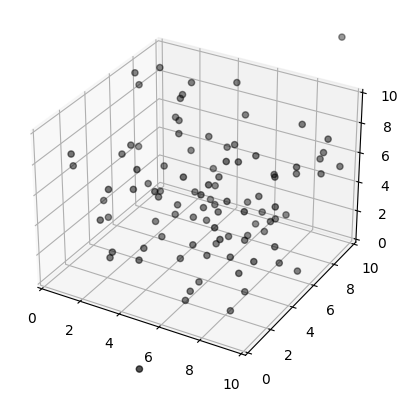

In [247]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
 
# Constants 
N = 100  # number of particles
L = 10.0  # length of the simulation box 
dt = 0.01  # time step 
t = 0.0  # initial time 
nsteps = 100  # number of time steps 
 
# Initial conditions
r = np.random.rand(N, 3) * L
v = np.zeros((N, 3))
a = np.zeros((N, 3)) 
m = 1.0 
 
# Force calculation
def force(r):
    f = np.zeros((N, 3))
    for i in range(N):
        for j in range(i+1, N):
            rij = r[i] - r[j] 
            fij = 24 * (2 / np.power(np.linalg.norm(rij), 14) - 1 / np.power(np.linalg.norm(rij), 8)) * rij 
            f[i] += fij
            f[j] -= fij 
    return f 
 
# Plot initial particle positions 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r[:,0], r[:,1], r[:,2],color='k')
ax.set_xlim([0, L])
ax.set_ylim([0, L]) 
ax.set_zlim([0, L])
# Update particle positions at each time step and plot
for step in range(nsteps):
    r_half = r + v * dt/2     
    f = force(r_half)     
    a = f / m 
    r = r + v * dt + 0.5 * a * dt**2
    f_new = force(r) 
    v = v + 0.5 * (f + f_new) * dt / m
    t += dt 
    ax.clear() 
    ax.scatter(r[:,0], r[:,1], r[:,2],color='k') 
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.set_zlim([0, L])
    plt.pause(0.01) 
 
plt.show() 


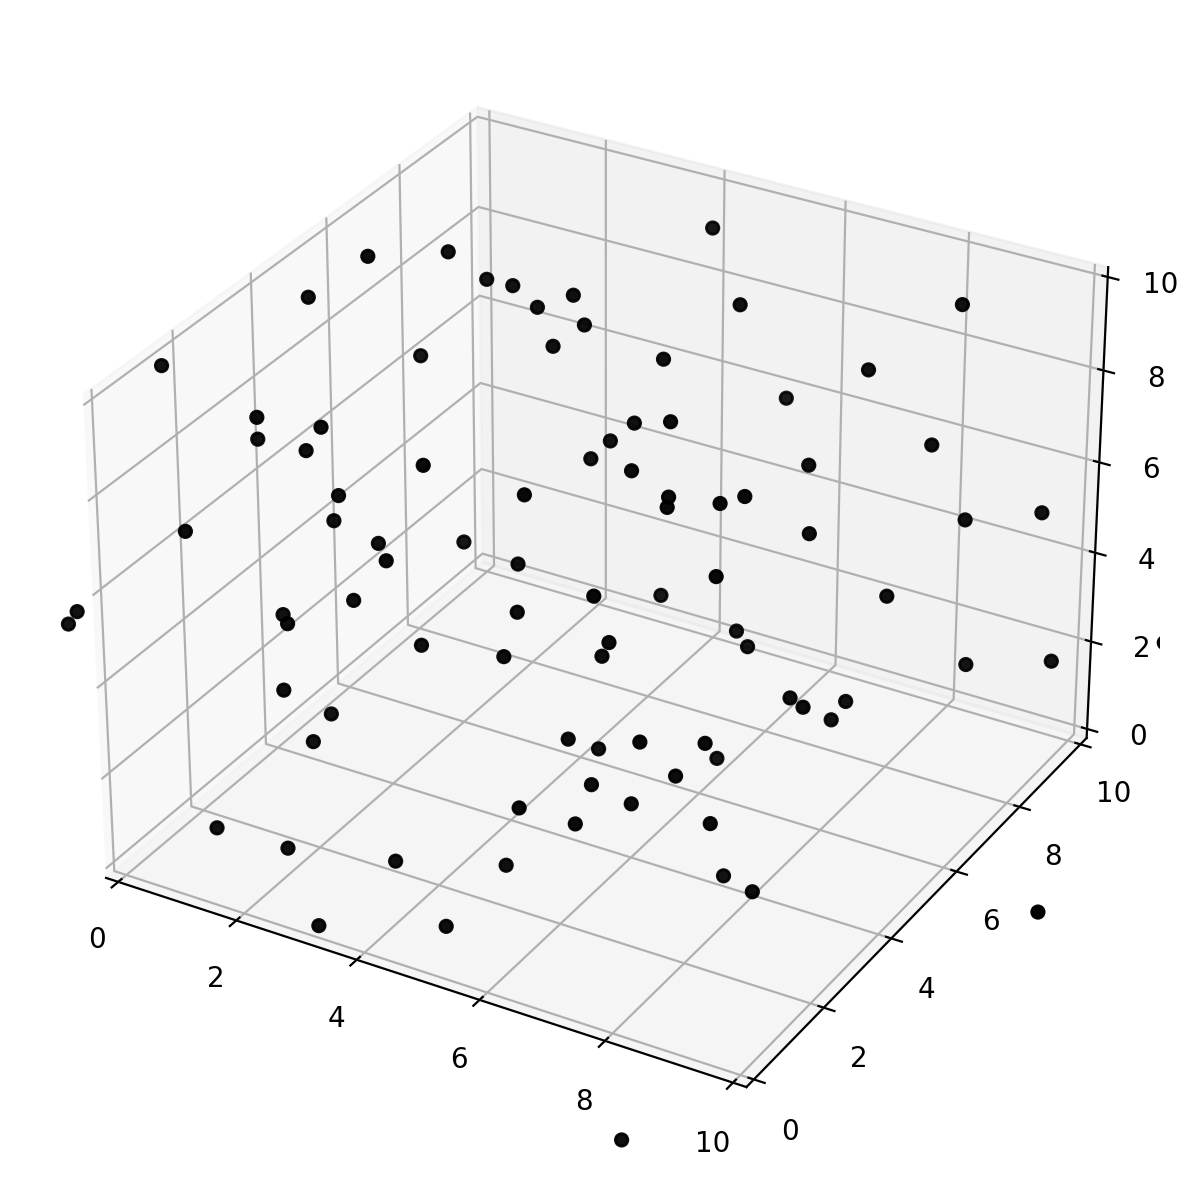

In [248]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation

# Constants 
N = 100  # number of particles
L = 10.0  # length of the simulation box 
dt = 0.01  # time step 
t = 0.0  # initial time 
nsteps = 100  # number of time steps 
 
# Initial conditions
r = np.random.rand(N, 3) * L
v = np.zeros((N, 3))
a = np.zeros((N, 3)) 
m = 1.0 
 
# Force calculation
def force(r):
    f = np.zeros((N, 3))
    for i in range(N):
        for j in range(i+1, N):
            rij = r[i] - r[j] 
            fij = 24 * (2 / np.power(np.linalg.norm(rij), 14) - 1 / np.power(np.linalg.norm(rij), 8)) * rij 
            f[i] += fij
            f[j] -= fij 
    return f

# Animation update function
def update(frame):
    global r, v, t
    r_half = r + v * dt/2
    f = force(r_half)
    a = f / m
    r = r + v * dt + 0.5 * a * dt**2
    f_new = force(r)
    v = v + 0.5 * (f + f_new) * dt / m
    t += dt
    ax.clear()
    ax.scatter(r[:, 0], r[:, 1], r[:, 2],color='k')
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.set_zlim([0, L])
  
# Create initial plot
fig = plt.figure(figsize=(6,6),dpi=200,tight_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
  
# Create animation
ani = animation.FuncAnimation(fig, update, frames=nsteps, interval=100)

# Save the animation as a GIF
ani.save('particle_animation.gif', writer='pillow')


1. The code simulates particle motion in 3D and visualizes it using matplotlib.
2. Initial conditions: `N=100` particles with random positions, zero velocities and accelerations.
3. Verlet algorithm: Updates particle positions and velocities based on forces and accelerations.
4. Positions and velocities are updated using the Verlet algorithm at each time step.
5. The `force()` function calculates pairwise forces based on Lennard-Jones potential.
6. Particle positions are plotted using `scatter()` function in a 3D plot.
7. `plt.pause()` introduces a pause between plot updates for animation.
8. The simulation ends after the specified number of time steps (nsteps).
9. `N=100` means there are 100 particles in the simulation.
10. Yes, attached.